<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Целевой-признак" data-toc-modified-id="Целевой-признак-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Целевой признак</a></span></li><li><span><a href="#Преобразование-признаков." data-toc-modified-id="Преобразование-признаков.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Преобразование признаков.</a></span></li><li><span><a href="#Разбиение-данных-на-выборки" data-toc-modified-id="Разбиение-данных-на-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разбиение данных на выборки</a></span></li><li><span><a href="#Масшабирование-признаков" data-toc-modified-id="Масшабирование-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Масшабирование признаков</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подберем-гипперпараметр-для-Дерева-решений" data-toc-modified-id="Подберем-гипперпараметр-для-Дерева-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подберем гипперпараметр для Дерева решений</a></span></li><li><span><a href="#Подберем-гипперпараметр-для-Случайного-леса." data-toc-modified-id="Подберем-гипперпараметр-для-Случайного-леса.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подберем гипперпараметр для Случайного леса.</a></span></li><li><span><a href="#Результаты-исследования" data-toc-modified-id="Результаты-исследования-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Результаты исследования</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки." data-toc-modified-id="Увеличение-выборки.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки.</a></span></li><li><span><a href="#Уменьшение-выборки." data-toc-modified-id="Уменьшение-выборки.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки.</a></span></li><li><span><a href="#Подберем-гипперпарметры-для-лучшей-модели-(Случайный-лес)" data-toc-modified-id="Подберем-гипперпарметры-для-лучшей-модели-(Случайный-лес)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подберем гипперпарметры для лучшей модели (Случайный лес)</a></span></li><li><span><a href="#Результат" data-toc-modified-id="Результат-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Результат</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Итоговый-вывод." data-toc-modified-id="Итоговый-вывод.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Итоговый вывод.</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    f1_score,
    roc_auc_score,
    roc_curve
)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [2]:
#откроем и изучим файл с данными
data = pd.read_csv('Churn_Modelling.csv')
#посмотрим первые и последнии 5 строк 
display(data.head())
display(data.tail())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Целевой признак

Целевым признаком будет уход клиента ('1' - ушел, '0' - остался)

Наш датафрейм содержит 13 признаков(10-количественные, 3-качественные) и 10000 строк.

In [4]:
#выведем болле подробную информацию о наших признаков
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Можем заменить , что признаки CreditScore, Age, Balance и EstimatedSalary имеют большой разброс.Нужно будет сделать масштабирование признаков.

Проверим ,есть ли у нас пропущенные значения

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Удалим слолбцы Surname, CustomerId, RowNumber, так как при преобразование признаков будутбольшие и ненужные данные.

In [6]:
data = data.drop(['Surname','CustomerId', 'RowNumber'], axis=1)

Данные готовы для дальнешей работы с ним.

### Преобразование признаков.

Для того чтобы преобразовать категориальные признаки в количественные воспользуемся функцией из библиотеки sklearm get_dummies с параметров drop_first, это поможет нам избежать Дамми-ловушку , так не позволит создать больше признаков.

In [7]:
df_ohe = pd.get_dummies(data, drop_first=True)
display(df_ohe.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Проверим наш результат.

In [8]:
df_ohe.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

Все супер.

### Разбиение данных на выборки

Разделим данные на 3 выборки 

In [9]:
features = df_ohe.drop('Exited', axis = 1)
target = df_ohe['Exited']

In [10]:
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target,  
                                                                              test_size=0.40, 
                                                                              random_state=12345
                                                                              )
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, 
                                                                            target_valid, 
                                                                            test_size=0.50, 
                                                                            random_state=12345
                                                                            )

Проверим наш результат

In [11]:
print('Размер тестовой выборки:', features_train.shape)
print('Размер валидационной выборки:', features_valid.shape)
print('Размер тестовой выборки:', features_test.shape)

Размер тестовой выборки: (6000, 11)
Размер валидационной выборки: (2000, 11)
Размер тестовой выборки: (2000, 11)


### Масшабирование признаков

In [12]:
display(df_ohe.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Приведем признаки к одному масштабу при помощи StandardScaler

In [13]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [14]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

Преобразуем обучающую , валидационную и тестовую выборку функцией transform

In [15]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Проверим

In [16]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.027273,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.027273,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.707790,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.333248,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.054802,1.140475,-0.891560,0,0,1.524268,1,0,0


### Промежуточный вывод

В подготовке данных мы сделали:
1) Исследовали данные  
2) Преобразовали признаки  
3) Разбили данные на три выборки(тестовую , валидационную, обучающую)  
4) Масштабирование признаков  

## Исследование задачи

Исследуем баланс классов

In [17]:
values = df_ohe['Exited'].value_counts()
values = values.to_frame().reset_index()
values.columns = ['Boolean', 'Count']
values['Proc'] = df_ohe['Exited'].value_counts(normalize=True)
pd.DataFrame(values)


,Boolean,Count,Proc
0,0,7963,0.7963
1,1,2037,0.2037


Видим , что классы не сбалансированы  
Обучим разные модели без учета дисбаланса

In [18]:
models = [LogisticRegression(random_state=12345), 
          DecisionTreeClassifier(random_state=12345), 
          RandomForestClassifier(random_state=12345)]

results_imbalanced = []

for model in models:
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])
    results_imbalanced.append({'Model': model.__class__.__name__, 
                               'Accuracy': accuracy, 
                               'F1': f1, 
                               'ROC': roc_auc})
pd.DataFrame(results_imbalanced)

,Model,Accuracy,F1,ROC
0,LogisticRegression,0.803,0.334459,0.758475
1,DecisionTreeClassifier,0.787,0.491647,0.678776
2,RandomForestClassifier,0.862,0.584337,0.840208


Наилучший результат показала модель Случайного леса.

### Подберем гипперпараметр для Дерева решений

In [19]:
%%time
test_hyperpar_DTC = []

for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)        
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])       
    test_hyperpar_DTC.append({'Model': 'DecisionTreeClassifier', 
                        'Hyperparameters': {'random_state': 12345, 'max_depth':depth},
                        'Accuracy': accuracy, 
                        'F1': f1, 
                        'ROC AUC': roc_auc})

pd.DataFrame(test_hyperpar_DTC).style.highlight_max(color = 'red', axis = 0)

CPU times: user 208 ms, sys: 1.69 ms, total: 209 ms
Wall time: 211 ms


,Model,Hyperparameters,Accuracy,F1,ROC AUC
0,DecisionTreeClassifier,"{'random_state': 12345, 'max_depth': 1}",0.791000,0.000000,0.692557
1,DecisionTreeClassifier,"{'random_state': 12345, 'max_depth': 2}",0.824000,0.521739,0.750181
2,DecisionTreeClassifier,"{'random_state': 12345, 'max_depth': 3}",0.838000,0.423488,0.797344
3,DecisionTreeClassifier,"{'random_state': 12345, 'max_depth': 4}",0.852000,0.552870,0.813428
4,DecisionTreeClassifier,"{'random_state': 12345, 'max_depth': 5}",0.853000,0.540625,0.822168
5,DecisionTreeClassifier,"{'random_state': 12345, 'max_depth': 6}",0.858000,0.569697,0.816463
6,DecisionTreeClassifier,"{'random_state': 12345, 'max_depth': 7}",0.850500,0.532081,0.815232
7,DecisionTreeClassifier,"{'random_state': 12345, 'max_depth': 8}",0.850500,0.543511,0.809057
8,DecisionTreeClassifier,"{'random_state': 12345, 'max_depth': 9}",0.852000,0.572254,0.783247
9,DecisionTreeClassifier,"{'random_state': 12345, 'max_depth': 10}",0.834000,0.538889,0.768530


Наилучшеей значение мтерики F1 наблюдается при глубине 9.

Что-то даже при подборе гипперпараметров Случайный лес выглядит лучше.

### Подберем гипперпараметр для Случайного леса.

In [20]:
%%time
test_hyperpar_RFC = []

for depth in range(1,15):
    for estimator in range(10, 101, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth=depth) 
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        accuracy = accuracy_score(target_valid, predictions_valid)        
        f1 = f1_score(target_valid, predictions_valid)
        roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])       
        test_hyperpar_RFC.append({'Model': 'RandomForestClassifier', 
                               'Hyperparameters': {'random_state': 12345, 
                                                   'n_estimators': estimator, 
                                                   'max_depth':depth}, 
                               'Accuracy': accuracy,
                               'F1': f1, 
                               'ROC AUC': roc_auc})
pd.DataFrame(test_hyperpar_RFC).style.highlight_max(color = 'red', axis = 0)

CPU times: user 35.2 s, sys: 121 ms, total: 35.3 s
Wall time: 35.3 s


,Model,Hyperparameters,Accuracy,F1,ROC AUC
0,RandomForestClassifier,"{'random_state': 12345, 'n_estimators': 10, 'max_depth': 1}",0.791000,0.000000,0.759249
1,RandomForestClassifier,"{'random_state': 12345, 'n_estimators': 20, 'max_depth': 1}",0.791000,0.000000,0.783150
2,RandomForestClassifier,"{'random_state': 12345, 'n_estimators': 30, 'max_depth': 1}",0.791000,0.000000,0.794104
3,RandomForestClassifier,"{'random_state': 12345, 'n_estimators': 40, 'max_depth': 1}",0.791000,0.000000,0.797829
4,RandomForestClassifier,"{'random_state': 12345, 'n_estimators': 50, 'max_depth': 1}",0.791000,0.000000,0.799306
5,RandomForestClassifier,"{'random_state': 12345, 'n_estimators': 60, 'max_depth': 1}",0.791000,0.000000,0.800180
6,RandomForestClassifier,"{'random_state': 12345, 'n_estimators': 70, 'max_depth': 1}",0.791000,0.000000,0.798360
7,RandomForestClassifier,"{'random_state': 12345, 'n_estimators': 80, 'max_depth': 1}",0.791000,0.000000,0.797312
8,RandomForestClassifier,"{'random_state': 12345, 'n_estimators': 90, 'max_depth': 1}",0.791000,0.000000,0.798313
9,RandomForestClassifier,"{'random_state': 12345, 'n_estimators': 100, 'max_depth': 1}",0.791000,0.000000,0.797857


При подборе гипперпараметров наилучий результат F1 = 0.58 при кол-ве деревьев 50, и глубиной дерева 12.

### Результаты исследования

1) Проверили баланс классов  
2) Обучили следующие модели без учёта дисбаланса:  
   Дерево принятия решений  
   Случайный лес  
   Логистическая регрессия.  
   Для каждой из моделей вывели следующие метрики: accuracy_score, f1_score и roc_auc_score.

## Борьба с дисбалансом

### Увеличение выборки.

In [21]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)



Обучим модель уже на сбаланссированных данных.

In [22]:
results_upsampling = []

for model in models:
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    
    accuracy = accuracy_score(target_valid, predictions_valid)
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])
    
    results_upsampling.append({'Model': model.__class__.__name__, 
                               'Accuracy_balance': accuracy,
                               'F1_balance': f1, 
                               'ROC_balance': roc_auc})
display(pd.DataFrame(results_upsampling))

display(pd.DataFrame(results_imbalanced))

,Model,Accuracy_balance,F1_balance,ROC_balance
0,LogisticRegression,0.6995,0.485004,0.763268
1,DecisionTreeClassifier,0.7960,0.500000,0.682704
2,RandomForestClassifier,0.8540,0.613757,0.838698


,Model,Accuracy,F1,ROC
0,LogisticRegression,0.803,0.334459,0.758475
1,DecisionTreeClassifier,0.787,0.491647,0.678776
2,RandomForestClassifier,0.862,0.584337,0.840208


Модель случайного леса стала немнго лучше.Метрика F1 была (0.58) , а стала (0.6)

### Уменьшение выборки.

In [23]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Посмотрим на балансс классов.

In [24]:
print(features_downsampled.shape)
print(target_downsampled.shape)

(2397, 11)
(2397,)


Обучим модель на сбаланссированных данных.

In [25]:
results_downsampling = []

for model in models:
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    
    accuracy = accuracy_score(target_valid, predictions_valid)
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])
    
    results_downsampling.append({'Model': model.__class__.__name__, 
                                 'Accuracy_Down': accuracy, 
                                 'F1_Down': f1, 
                                 'ROC_Down': roc_auc})

In [26]:
display(pd.DataFrame(results_imbalanced))
display(pd.DataFrame(results_downsampling))

,Model,Accuracy,F1,ROC
0,LogisticRegression,0.803,0.334459,0.758475
1,DecisionTreeClassifier,0.787,0.491647,0.678776
2,RandomForestClassifier,0.862,0.584337,0.840208


,Model,Accuracy_Down,F1_Down,ROC_Down
0,LogisticRegression,0.7000,0.480069,0.761656
1,DecisionTreeClassifier,0.6925,0.487073,0.694731
2,RandomForestClassifier,0.7765,0.577105,0.842796


Лучше стала модель логистической регрессии , но остальные модели лучше работаю с увеличением выборки.Выберем пожалуй случайны лес с upsampled.

### Подберем гипперпарметры для лучшей модели (Случайный лес)

In [27]:
%%time
result = []
for depth in range(1,15):
    for estimator in range(10, 101, 10): 
        model = RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth=depth) 
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        accuracy = accuracy_score(target_valid, predictions_valid)        
        f1 = f1_score(target_valid, predictions_valid)
        roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])       
        result.append({'Model': 'RandomForestClassifier', 
                               'Hyperparameters': {'random_state': 12345, 
                                                   'n_estimators': estimator, 
                                                   'max_depth':depth}, 
                                                 'Accuracy': accuracy,
                                                 'F1 score': f1, 
                                                 'ROC AUC score': roc_auc})

CPU times: user 47.1 s, sys: 147 ms, total: 47.2 s
Wall time: 47.2 s


Выведем лучший результат (можно было сразу в цикле сделать)

In [28]:
df_result = pd.DataFrame.from_dict(result)
display(df_result[df_result['F1 score']==df_result['F1 score'].max()])

,Model,Hyperparameters,Accuracy,F1 score,ROC AUC score
86,RandomForestClassifier,"{'random_state': 12345, 'n_estimators': 70, 'm...",0.825,0.630021,0.852574


Лучшей значение n_estimators равна 70. 

### Результат

1) Применили несколько способов борьбы с дисбалансом  
2) Выяснили , что лучшая модель это Случайный лес при увеличеннии выборки.  
3) Настройка гиперпараметров позволила улучшить показатель метрики f1_score для случайного леса:  
   Случайный лес: 0.63
.



## Тестирование модели

Протестируем на модели случайного леса , так как она показала себя лучше всего

In [29]:
model_final = RandomForestClassifier(random_state=12345, n_estimators=70, max_depth=10)
model_final.fit(features_upsampled, target_upsampled)  
predictions_final = model_final.predict(features_test)
probabilities_final = model_final.predict_proba(features_test)
accuracy_final = accuracy_score(target_test, predictions_final)
f1_final = f1_score(target_test, predictions_final)
roc_auc_final = roc_auc_score(target_test, probabilities_final[:,1])
print('Accuracy', accuracy_final)
print('F1', f1_final)
print('ROC_AUC', roc_auc_final)

Accuracy 0.822
F1 0.6172043010752688
ROC_AUC 0.8553677194781364


Как видим значение F1 = 0.61 , что как раз и нудно для задание с этим мы справились , исследуем теперь метрику ROC_AUC

Построим график ROC кривой.

<Figure size 432x288 with 0 Axes>

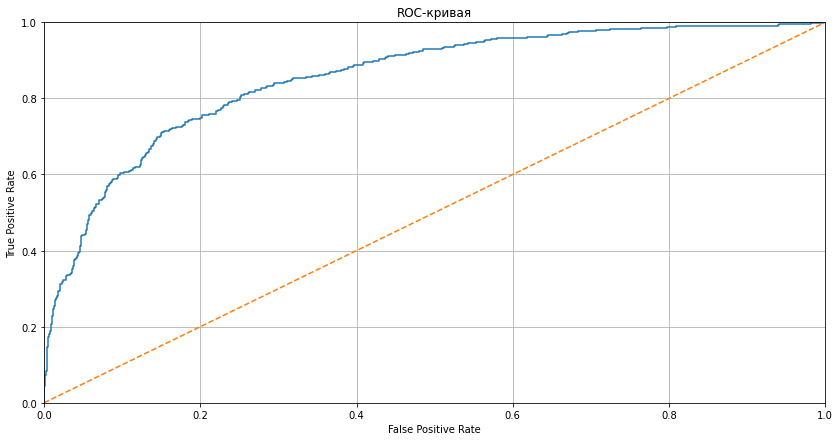

In [48]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_final[:,1])

plt.figure();
plt.figure(figsize=(14, 7))

plt.grid ( True )
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

           
plt.show();


### Итоговый вывод.

Проверка модели на тестовой выборке показывает, что модель работает достаточно хорошо — показатель метрики f1 удалось достигнуть выше, чем было заявлено в требованиях (минимальное требование к этой метрике было 0.59, наша модель дает результат 0.61).  
  
Что касаеться roc_auc = 0.855, это хороший результат.  
  
Считаю , что модель работает хорошо и цель проекта достигнута.  

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*